In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('celldata.csv')
print(df.head())
print(df.info())
print(df.describe())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          632   Germany  Female   50       5  107959.39              1   
1          649    France  Female   42       7       0.00              2   
2          595    France    Male   29       6  150685.79              1   
3          653     Spain    Male   35       6  116662.96              2   
4          559     Spain  Female   40       7  144470.77              1   

   HasCrCard  IsActiveMember  Salary  Churn  
0          1               1    6985      1  
1          0               1   22974      0  
2          1               0   87771      0  
3          1               1   23864      0  
4          1               1   18918      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     8000 non-null   int64  
 1   Geography       8000 non-n

In [3]:
print(df.describe().loc[['min', 'max']])
print(df.isnull().sum())

print(df['Geography'].unique())
print(df['Gender'].unique())

     CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
min        350.0  18.0     0.0       0.00            1.0        0.0   
max        850.0  92.0    10.0  250898.09            4.0        1.0   

     IsActiveMember    Salary  Churn  
min             0.0      12.0    0.0  
max             1.0  199992.0    1.0  
CreditScore       0
Geography         0
Gender            0
Age               0
Tenure            0
Balance           0
NumOfProducts     0
HasCrCard         0
IsActiveMember    0
Salary            0
Churn             0
dtype: int64
['Germany' 'France' 'Spain']
['Female' 'Male']


In [4]:
y = df['Churn']
X = df.drop(columns=['Churn'])
X['Gender'] = X['Gender'].map({'Female': 0, 'Male': 1})
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)
print(X.head())
print(X.info())
print(y.value_counts())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          632       0   50       5  107959.39              1          1   
1          649       0   42       7       0.00              2          0   
2          595       1   29       6  150685.79              1          1   
3          653       1   35       6  116662.96              2          1   
4          559       0   40       7  144470.77              1          1   

   IsActiveMember  Salary  Geography_Germany  Geography_Spain  
0               1    6985               True            False  
1               1   22974              False            False  
2               0   87771              False            False  
3               1   23864              False             True  
4               1   18918              False             True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
--- 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

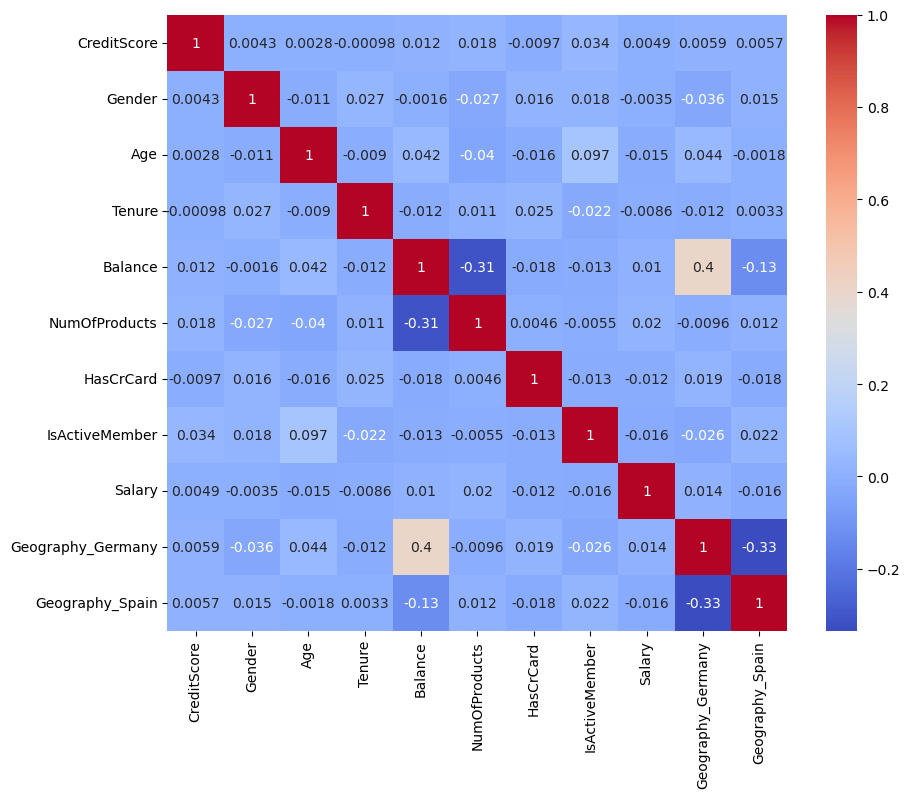

In [6]:
corr = X_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

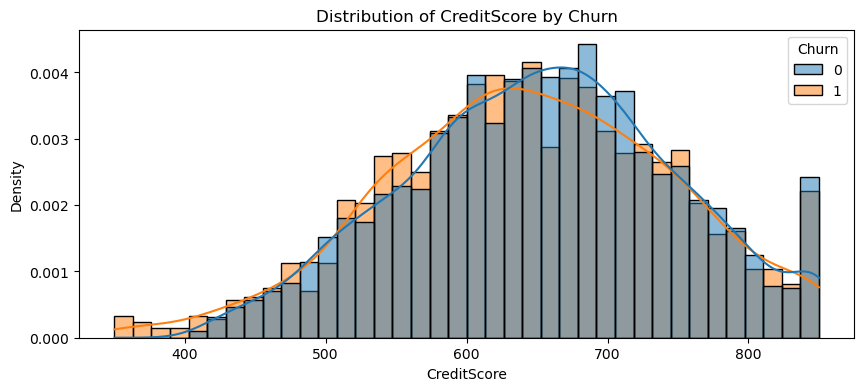

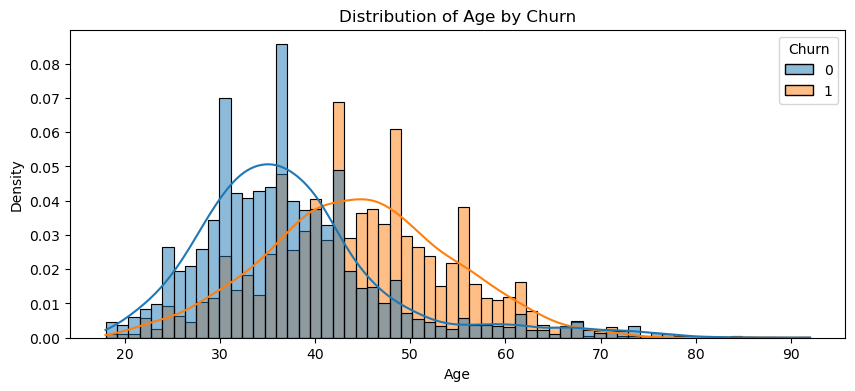

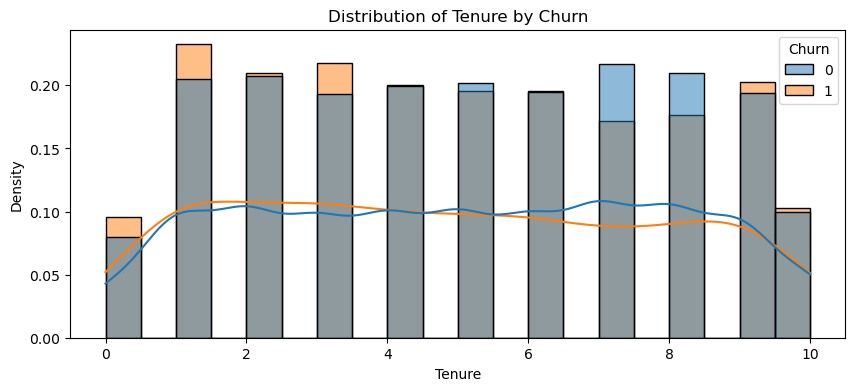

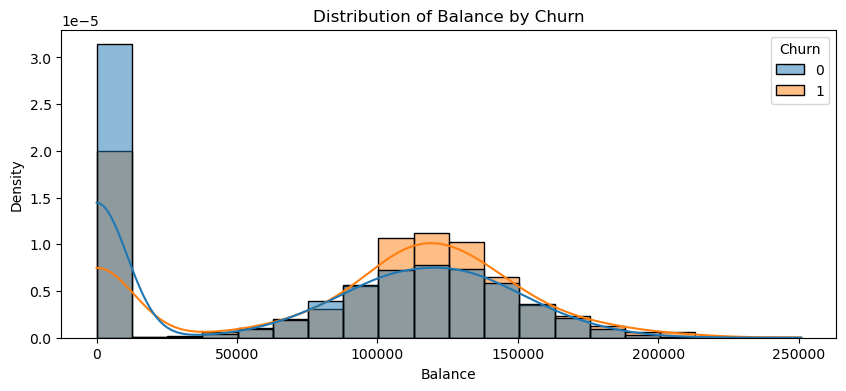

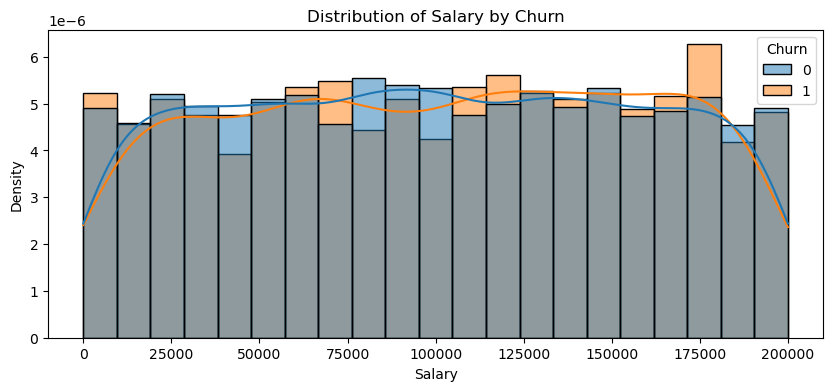

In [7]:
for col in ['CreditScore', 'Age', 'Tenure', 'Balance', 'Salary']:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

Accuracy: 0.7925
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1278
           1       0.40      0.06      0.10       322

    accuracy                           0.79      1600
   macro avg       0.60      0.52      0.49      1600
weighted avg       0.72      0.79      0.73      1600

Confusion Matrix:
[[1249   29]
 [ 303   19]]


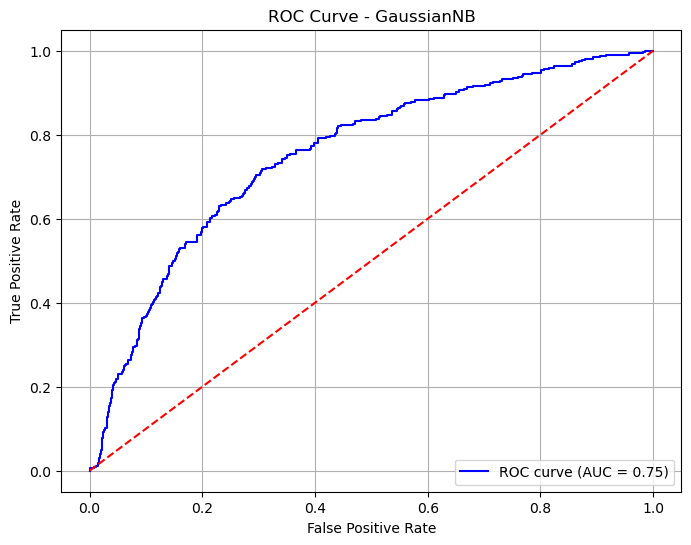

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, auc

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


y_prob = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GaussianNB')
plt.legend(loc='lower right')
plt.grid()
plt.show()



Accuracy: 0.8131
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1278
           1       0.61      0.20      0.30       322

    accuracy                           0.81      1600
   macro avg       0.72      0.58      0.60      1600
weighted avg       0.78      0.81      0.77      1600

Confusion Matrix:
[[1237   41]
 [ 258   64]]


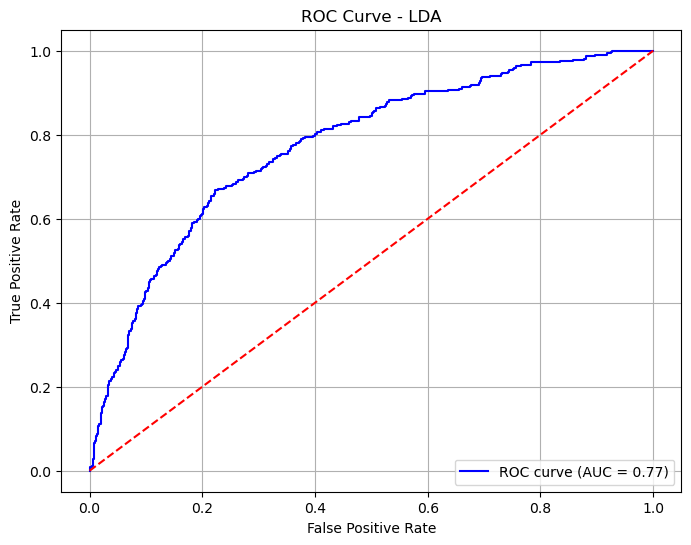

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_lda))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lda))


y_prob_lda = lda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LDA')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.8331
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1278
           1       0.66      0.35      0.46       322

    accuracy                           0.83      1600
   macro avg       0.76      0.65      0.68      1600
weighted avg       0.81      0.83      0.81      1600

Confusion Matrix:
[[1219   59]
 [ 208  114]]


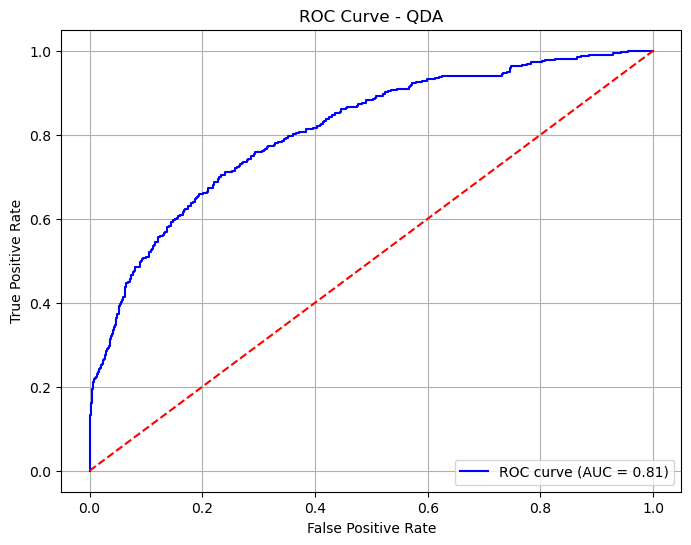

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_qda)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_qda))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_qda))


y_prob_qda = qda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - QDA')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.8150
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1278
           1       0.65      0.18      0.28       322

    accuracy                           0.81      1600
   macro avg       0.74      0.58      0.59      1600
weighted avg       0.79      0.81      0.77      1600

Confusion Matrix:
[[1247   31]
 [ 265   57]]


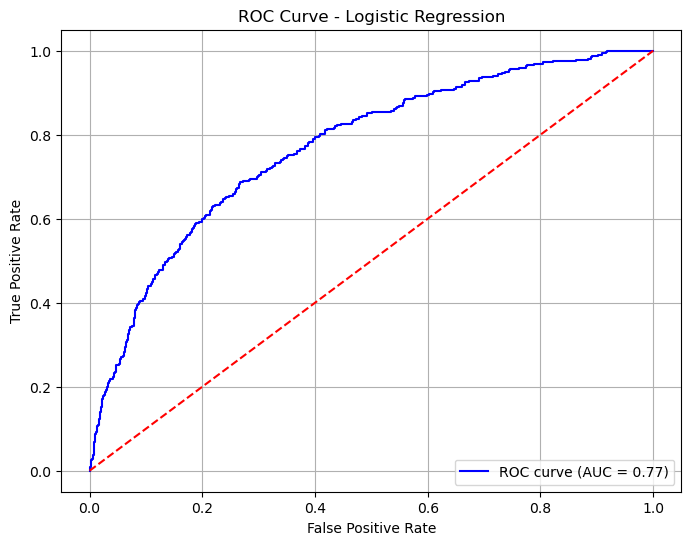

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_logreg))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logreg))

y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()  


Accuracy: 0.8325
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1278
           1       0.65      0.37      0.47       322

    accuracy                           0.83      1600
   macro avg       0.75      0.66      0.69      1600
weighted avg       0.81      0.83      0.81      1600

Confusion Matrix:
[[1213   65]
 [ 203  119]]


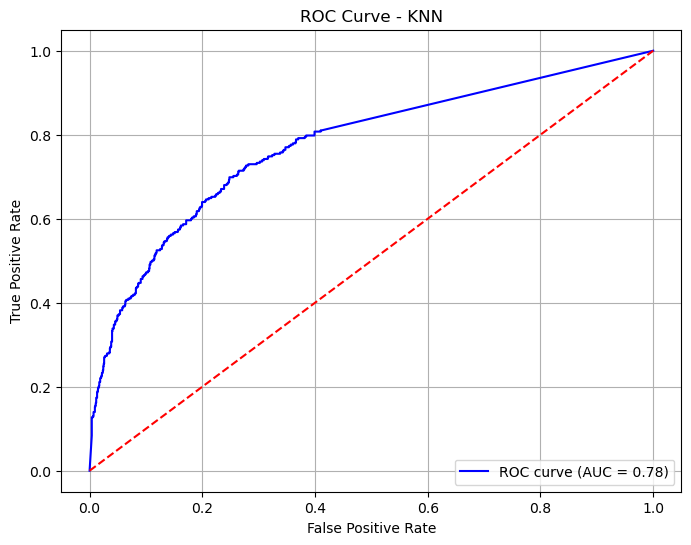

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))

y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Accuracy: 0.8413
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1278
           1       0.85      0.25      0.39       322

    accuracy                           0.84      1600
   macro avg       0.85      0.62      0.65      1600
weighted avg       0.84      0.84      0.80      1600

Confusion Matrix:
[[1264   14]
 [ 240   82]]


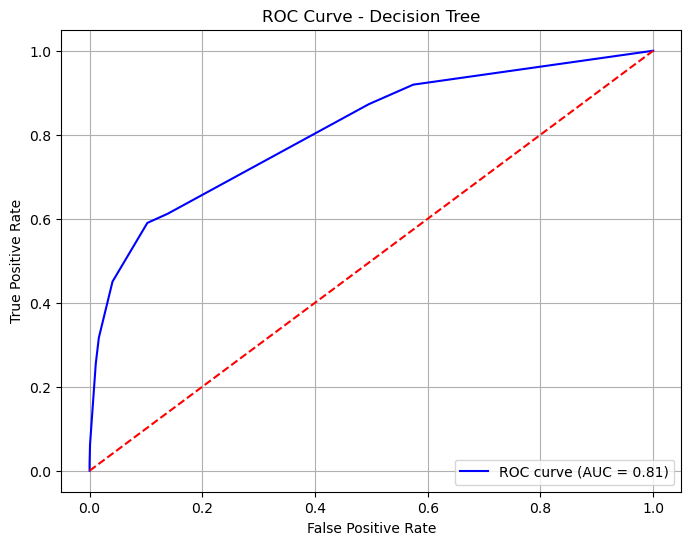

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=20, max_leaf_nodes=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.8569
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1278
           1       0.71      0.48      0.58       322

    accuracy                           0.86      1600
   macro avg       0.80      0.72      0.75      1600
weighted avg       0.85      0.86      0.85      1600

Confusion Matrix:
[[1215   63]
 [ 166  156]]


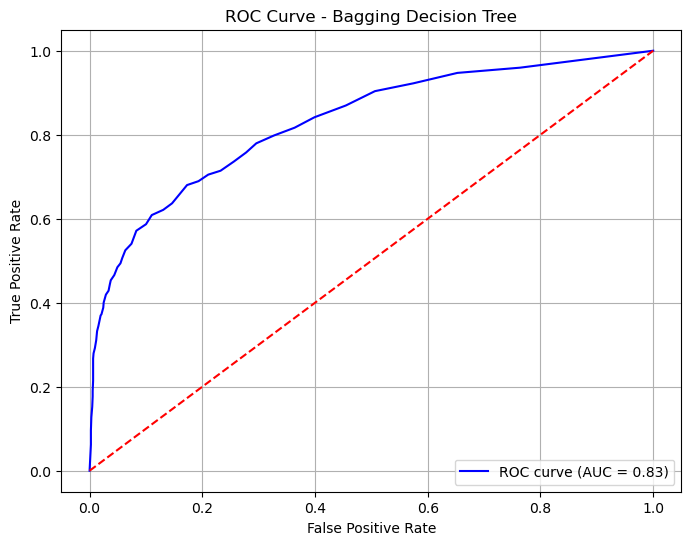

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini', random_state=42), n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging = bagging_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_bagging)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_bagging))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_bagging))
y_prob_bagging = bagging_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_bagging)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.8675
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1278
           1       0.78      0.48      0.59       322

    accuracy                           0.87      1600
   macro avg       0.83      0.72      0.76      1600
weighted avg       0.86      0.87      0.86      1600

Confusion Matrix:
[[1233   45]
 [ 167  155]]


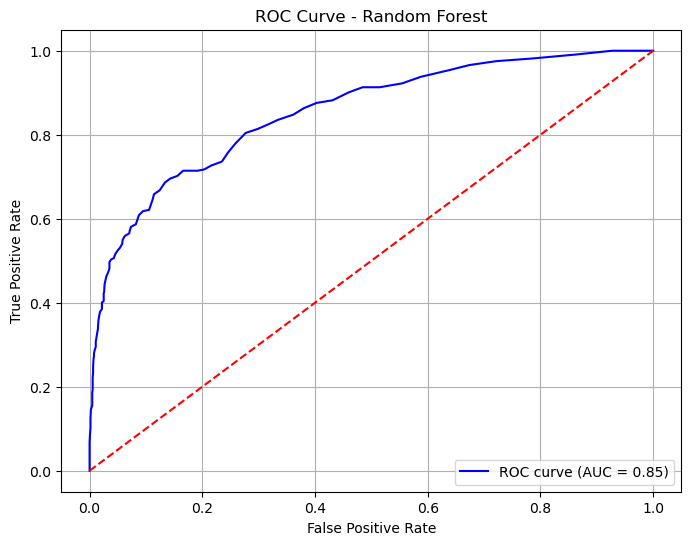

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.8612
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1278
           1       0.76      0.46      0.57       322

    accuracy                           0.86      1600
   macro avg       0.82      0.71      0.74      1600
weighted avg       0.85      0.86      0.85      1600

Confusion Matrix:
[[1230   48]
 [ 174  148]]


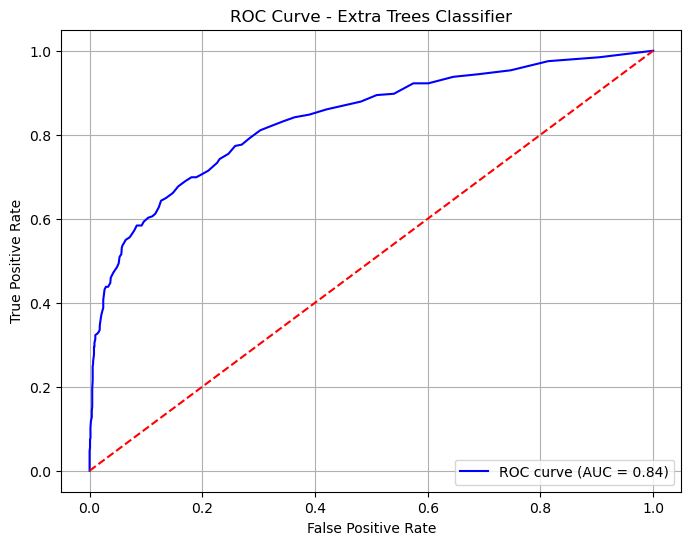

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

etf = ExtraTreesClassifier(criterion='gini', random_state=42)
etf.fit(X_train, y_train)
y_pred_etf = etf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_etf)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_etf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_etf))

y_prob_etf = etf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_etf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extra Trees Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()



Accuracy: 0.8556
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1278
           1       0.73      0.45      0.55       322

    accuracy                           0.86      1600
   macro avg       0.80      0.70      0.73      1600
weighted avg       0.84      0.86      0.84      1600

Confusion Matrix:
[[1225   53]
 [ 178  144]]


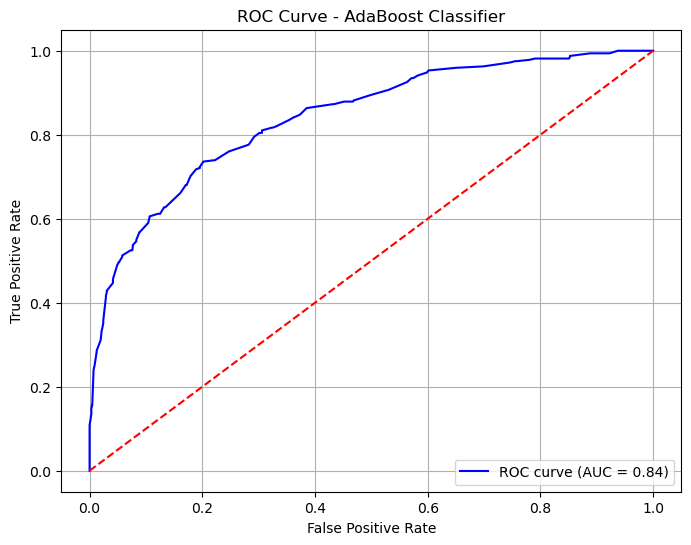

In [51]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=100, random_state=42)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_adb)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_adb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_adb))

y_prob_adb = adb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_adb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.8725
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1278
           1       0.80      0.49      0.61       322

    accuracy                           0.87      1600
   macro avg       0.84      0.73      0.77      1600
weighted avg       0.87      0.87      0.86      1600

Confusion Matrix:
[[1238   40]
 [ 164  158]]


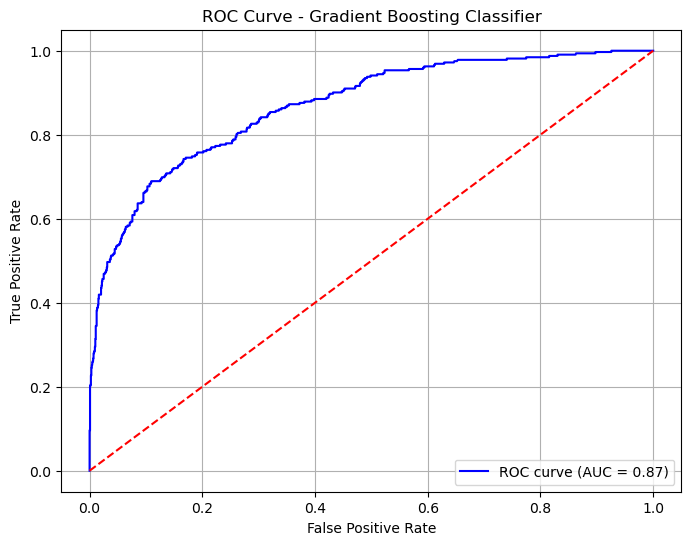

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gbc)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_gbc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gbc))
y_prob_gbc = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gbc)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [60]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Base learners
base_learners = [
    # Lineari / probabilistici
    ('gnb', GaussianNB()),
    ('lda', LinearDiscriminantAnalysis()),
    ('qda', QuadraticDiscriminantAnalysis()),
    ('lr', Pipeline([
        ('scaler', StandardScaler()),
        ('lr_model', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ])),
    
    # Alberi / ensemble
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('ab', AdaBoostClassifier(n_estimators=100, random_state=42)),
    
    # Instance-based
    ('knn', Pipeline([
        ('scaler', StandardScaler()),
        ('knn_model', KNeighborsClassifier(n_neighbors=5, weights='distance'))
    ]))
]

# Meta-learner
meta_learner = LogisticRegression(max_iter=1000)

# Stacking classifier (senza CV interna)
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=None  # niente cross-validation, usa direttamente fit sul training set
)

# Fit sul training set
stack_model.fit(X_train, y_train)

# Predizioni sul test set
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:, 1]

# Metriche finali
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1278
           1       0.78      0.50      0.61       322

    accuracy                           0.87      1600
   macro avg       0.83      0.73      0.77      1600
weighted avg       0.86      0.87      0.86      1600

ROC-AUC: 0.8659881997297797
